In [1]:
#importing the needed libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Data Preprocessing

In [2]:
#creating the needed variables

data = []                   #creating a empty list named data
labels = []                 #creating a empty list named labels
classes = 43                #as we have 43 different traffic signals to be classsified we take classes as 43
current_path = os.getcwd()  #this sets the current working directory to the variable current_path

In [3]:
#Retrieving the images and their labels 

for i in range(classes):
    path = os.path.join(current_path,'train',str(i)) #we join the paths of each image to the current path which 
    images = os.listdir(path)                        #is inside the "train" folder

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))            #resizing the image
            image = np.array(image)                  #converting the image into an array
            data.append(image)                       #appending the array to data list
            labels.append(i)                         #appending the array to label list
        except:
            print("Error loading image")

In [4]:
#Converting lists into numpy arrays

data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [5]:
#Splitting training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [6]:
#Converting the labels into one hot encoding

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Building a model

In [7]:
#Building a model

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:], name="CovolutionLayer1"))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu',name="CovolutionLayer2"))
model.add(MaxPool2D(pool_size=(2, 2),name="MaxpoolingLayer3"))
model.add(Dropout(rate=0.25,name="Drop"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name="CovolutionLayer4"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',name="CovolutionLayer5"))
model.add(MaxPool2D(pool_size=(2, 2),name="MaxpoolingLayer6"))
model.add(Dropout(rate=0.25,name="Drop2"))
model.add(Flatten(name="Flat"))
model.add(Dense(256, activation='relu',name="Dense7"))
model.add(Dropout(rate=0.5,name="Drop3"))
model.add(Dense(43, activation='softmax', name="Final"))

#Compilation of the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [12]:
#training the model

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 93s 95ms/step - loss: 1.9516 - accuracy: 0.4911 - val_loss: 0.6015 - val_accuracy: 0.8632
Epoch 2/15
981/981 [==============================] - 88s 90ms/step - loss: 0.6919 - accuracy: 0.7941 - val_loss: 0.1921 - val_accuracy: 0.9485
Epoch 3/15
981/981 [==============================] - 89s 90ms/step - loss: 0.4363 - accuracy: 0.8710 - val_loss: 0.1435 - val_accuracy: 0.9656
Epoch 4/15
981/981 [==============================] - 88s 90ms/step - loss: 0.3720 - accuracy: 0.8939 - val_loss: 0.1953 - val_accuracy: 0.9537
Epoch 5/15
981/981 [==============================] - 88s 89ms/step - loss: 0.3042 - accuracy: 0.9114 - val_loss: 0.0836 - val_accuracy: 0.9762
Epoch 6/15
981/981 [==============================] - 99s 101ms/step - loss: 0.2818 - accuracy: 0.9209 - val_loss: 0.0936 - val_accuracy: 0.9725
Epoch 7/15
981/981 [==============================] - 96s 98ms/step - loss: 0.2740 - accuracy: 0.9226 - val_loss: 0.0709 - val_accuracy

## Evaluation of the model

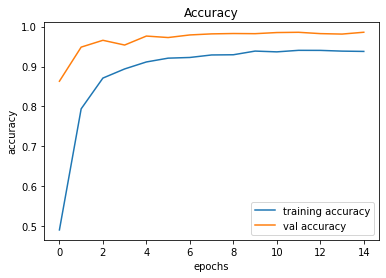

In [13]:
#Checking the training accuracy and the validation accuracy

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

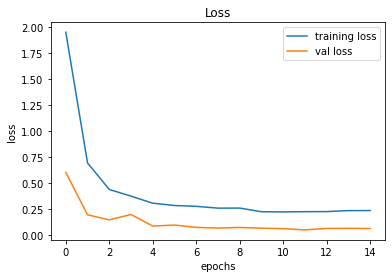

In [14]:
#Checking the training loss versus the validation loss

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**As the validation accuracy and the training accuracy are parallel and does not decrease/increase we can take this as the best fit**

## Prediction

In [15]:
#converting test images into an array 

y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

In [36]:
#Checking the actual label and predicted label of one specific image

y_pred = model.predict_classes(np.expand_dims(X_test[100], axis=0))
print('Y_pred = {} and Y_true = {}'.format(y_pred, labels[100]))

Y_pred = [1] and Y_true = 1


In [39]:
#predictions of all the data

pred = model.predict_classes(X_test)

## Accuracy of the model

In [40]:
#checking the accuracy of the model

from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9463182897862232
